In [24]:
import sys
sys.path.append("../src/")
import utils as ut
import fBm_stats as fbms
import matplotlib.pyplot as plt
import integration as itg
import numpy as np

data_path = "../data/"

In [4]:
h = 0.5
df_ns = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-noise.hdf5")
df_sol = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}.hdf5")

In [7]:
df_sol["vel"] = df_sol.deets_v.diff()
df_sol["acc"] = df_sol.vel.diff()

<Axes: >

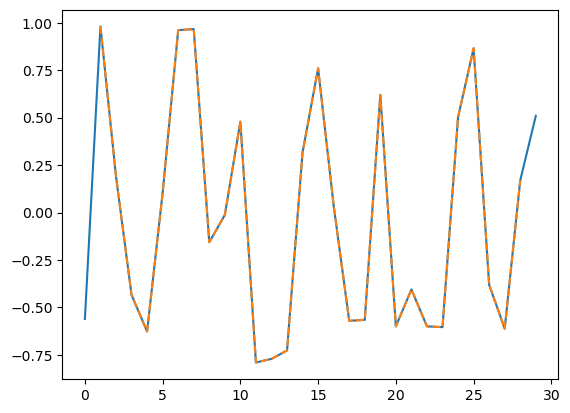

In [13]:
fig, ax = plt.subplots()
df_ns[:].reset_index().deets_v.plot(ax = ax)
df_sol[1:].reset_index().acc.plot(ax = ax, ls= "--")

In [71]:
def line(t):
    return t

def f_analytical(h, noise, t, x0, v0):
    return x0 + v0*line(t) + itg.convolution(h, noise, t)

In [86]:
x0 = df_sol["deets_v"].loc[2]
v0 = df_sol["vel"].loc[2]
noise = np.array(df_ns["deets_v"][0:-1])
time = np.array(df_ns["deets_v"][1:].reset_index().index)

In [87]:
analytical = f_analytical(line, noise, time, x0, v0)

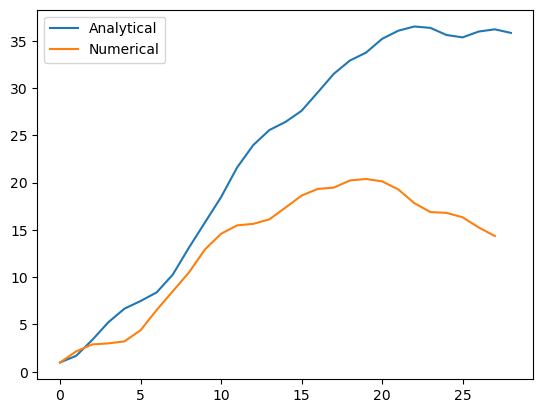

In [88]:
plt.plot(analytical, label = "Analytical")
plt.plot(df_sol[2:].deets_v.tolist(), label = "Numerical")
plt.legend()